# Decision tree classifier Toy example

Disclaimer: The following example was created only for my understanding. If you have any feedback please feel free to reach out

In [1]:
from matplotlib import gridspec
from matplotlib import pyplot
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
import plotter
from sklearn import tree

## Data generation

In [2]:
X, y = datasets.make_moons(n_samples=100, random_state=123, noise=0.08)

Text(0, 0.5, 'Feature 2')

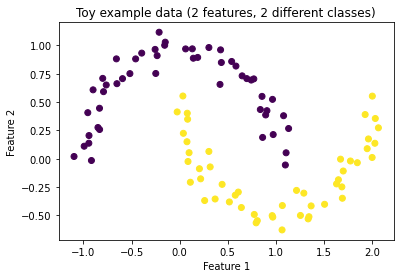

In [3]:
pyplot.scatter(X[:,0], X[:,1], c=y)
pyplot.title('Toy example data (2 features, 2 different classes)')
pyplot.xlabel('Feature 1')
pyplot.ylabel('Feature 2')

## Train / Test data

In [4]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.20)

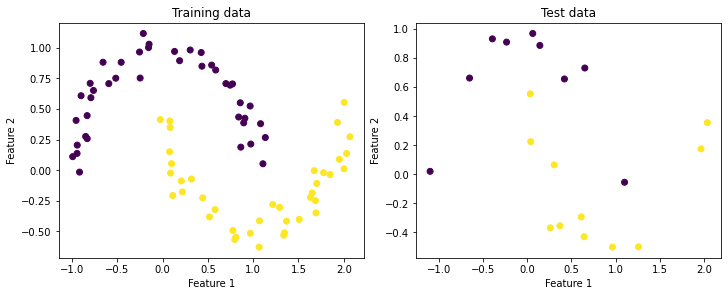

In [5]:
figure = pyplot.figure(constrained_layout=True, figsize=(10, 4))
grid_specification = gridspec.GridSpec(1, 2, figure=figure)
left_plot = figure.add_subplot(grid_specification[0, 0])
right_plot = figure.add_subplot(grid_specification[0, 1])

left_plot.set_title('Training data')
left_plot.set_xlabel('Feature 1')
left_plot.set_ylabel('Feature 2')
left_plot.scatter(x_train[:,0], x_train[:,1], c=y_train)

right_plot.set_title('Test data')
right_plot.set_xlabel('Feature 1')
right_plot.set_ylabel('Feature 2')
right_plot.scatter(x_test[:,0], x_test[:,1], c=y_test)

## Decision tree classifiers

### Different depths

In [6]:
depth_values = [1, 3, 5, 100, 1000, 10000]
desicion_tree_models = [tree.DecisionTreeClassifier(max_depth=depth) for depth in depth_values]
titles = [f'Decision tree with depth of {depth}' for depth in depth_values]

for model in desicion_tree_models:
    model.fit(x_train, y_train)

accuracies = [metrics.accuracy_score(y_test, model.predict(x_test)) for model in desicion_tree_models]

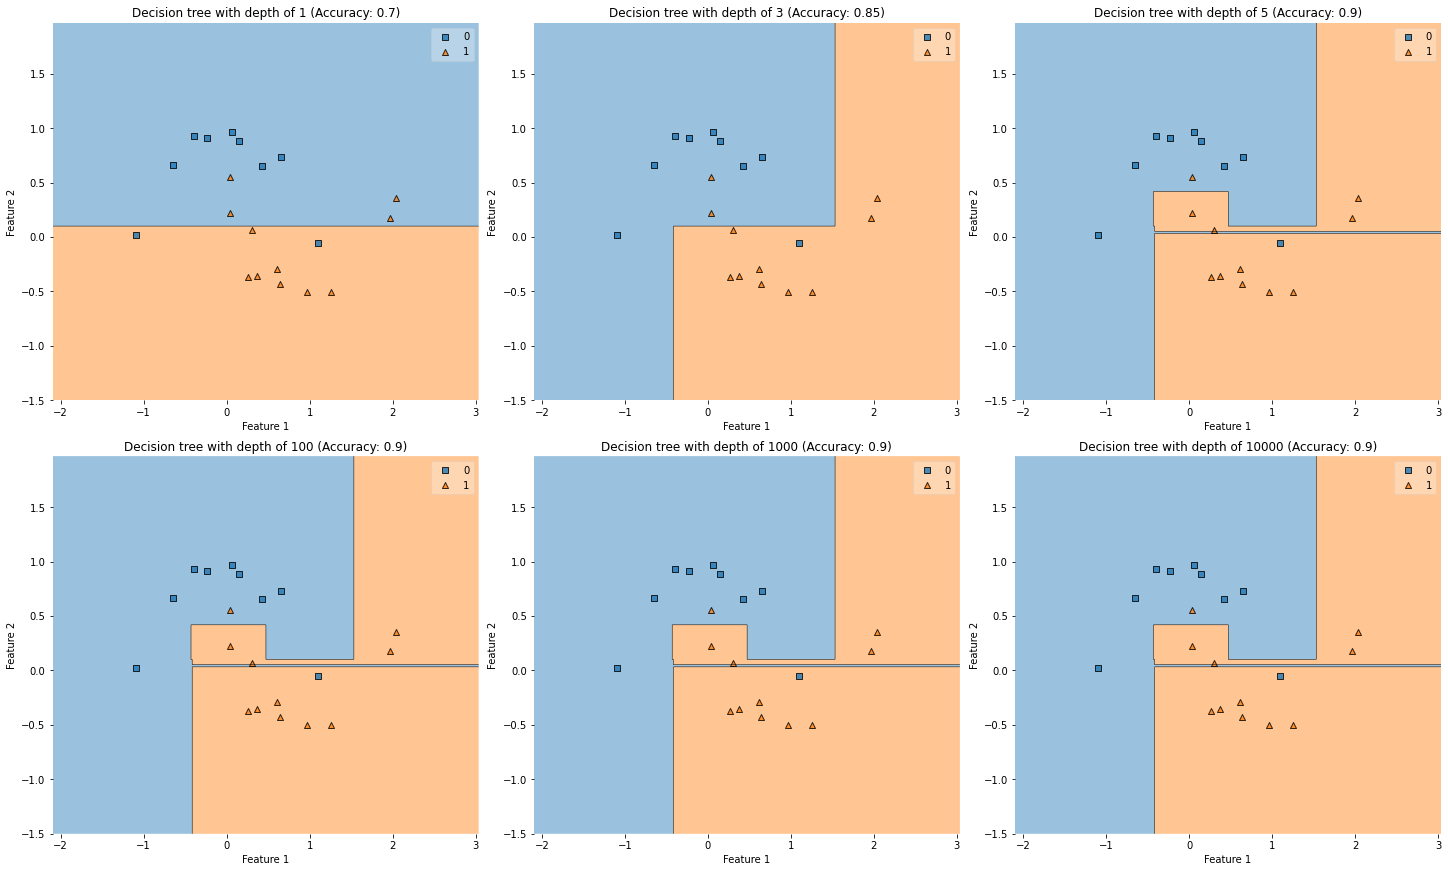

In [7]:
plotter.plot_multiple_predictions(desicion_tree_models, titles, accuracies, x_test, y_test)

Even if the number of the tree depth is incremented, at a certain point the accuracy is the same

### Different optimum split methodologies

In [8]:
methodologies = ['gini', 'entropy']
desicion_tree_models = [tree.DecisionTreeClassifier(max_depth=5, criterion=metodology) for metodology in methodologies]
titles = [f'Decision tree with {metodology}' for metodology in methodologies]

for model in desicion_tree_models:
    model.fit(x_train, y_train)

accuracies = [metrics.accuracy_score(y_test, model.predict(x_test)) for model in desicion_tree_models]

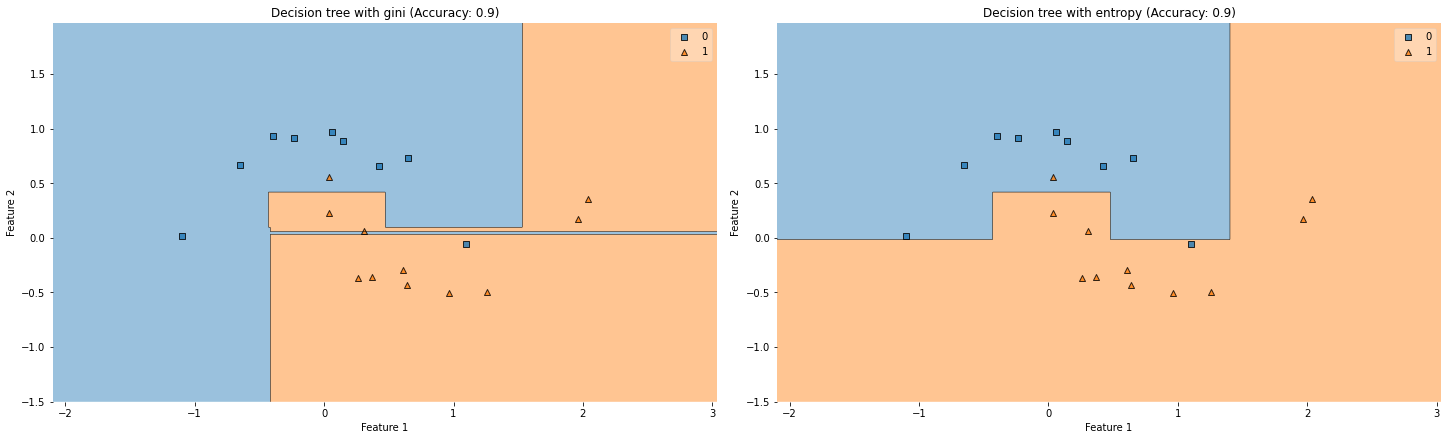

In [9]:
plotter.plot_multiple_predictions(desicion_tree_models, titles, accuracies, x_test, y_test)

The difference between both methodologies is not significant. The entropy methodology uses a logarithm, therefore, the needed computational power is greater in big datasets